## Simulazioni per determinare se _Resolve_, _Xtend_ e _XMM_ riescono a risolvere due temperature.

Sono sotto riportati i grafici, per diversi conteggi, del rapporto tra la temperatura ricavata dal fit e quella in input in funzione del rapporto tra le normalizzazioni, simulando uno spettro **phabs*(apec + apec)** con temperature della componente calda e fredda variabili (rispettivamente [5, 10] keV e [0.5, 1, 2] keV) e fittando un **phabs*(apec + apec)** con $T_{hot}$ e $T_{cold}$ impostate a 2 keV e 5 keV.

Si nota che in generale la temperatura fredda viene risolta meglio rispetto a quella calda. Per numero di conteggi pari a 100000, si osserva che il rapporto $T_{fit}/T_{input}$ della componente calda segue un andamento simile a quello ottenuto fittando un **phabs*(apec)**, per il quale si ottiene una $T_{fit}$ tanto più bassa quanto il rapporto $N_{cold}/N_{hot}$ è minore.

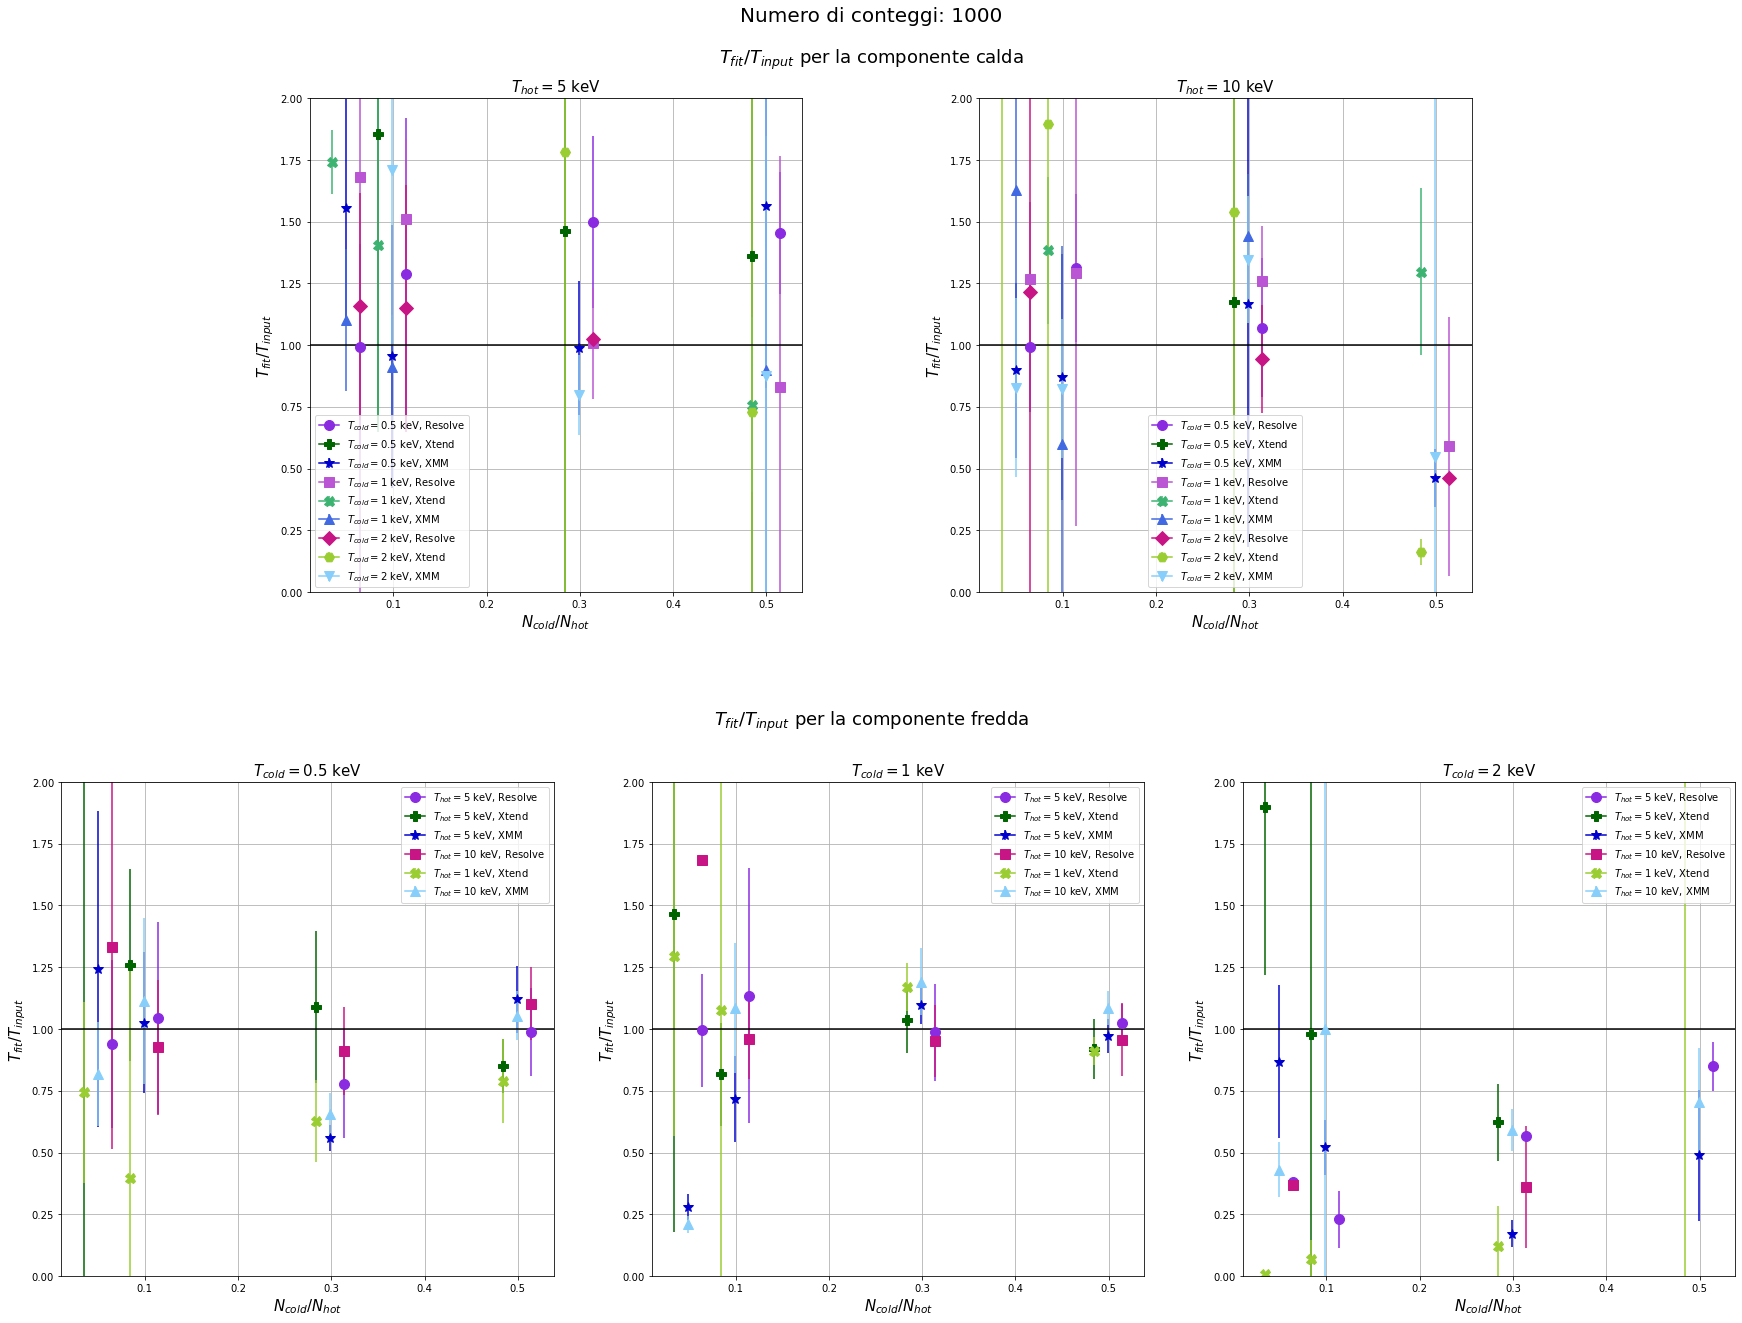

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import SubplotSpec

with open('Resolve/Temperature resolution/temp_resolve_1000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_resolve = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_resolve = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        

with open('Xtend/Temperature resolution/temp_xtend_1000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_hot_xtend = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xtend = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        
with open('XMM/Temperature resolution/temp_xmm_1000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_hot_xmm = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xmm = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        
fig, axes = plt.subplots(2, 3, figsize=(30,20))
axes[0, 2].set_visible(False)
axes[0, 0].set_position([0.24, 0.6, 0.228, 0.343])
axes[0, 1].set_position([0.55, 0.6, 0.228, 0.343])

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        i = 0
    if temp_hot[j] == 10:
        i = 1
    if temp_cold[j] == 0.5:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{cold}=0.5$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="P", markersize=10, label="$T_{cold}=0.5$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumblue', marker="*", markersize=10, label="$T_{cold}=0.5$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="P", markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumblue', marker="*", markersize=10)
    if temp_cold[j] == 1.:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s",  markersize=10, label="$T_{cold}=1$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="X",  markersize=10, label="$T_{cold}=1$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='royalblue', marker="^", markersize=10, label="$T_{cold}=1$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="X",  markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='royalblue', marker="^", markersize=10)
    if temp_cold[j] == 2.:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{cold}=2$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="H", markersize=10, label="$T_{cold}=2$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='lightskyblue', marker="v", markersize=10, label="$T_{cold}=2$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="H", markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='lightskyblue', marker="v", markersize=10)



for k in [0, 1]:
    axes[0, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
    axes[0, k].legend()
    axes[0, k].grid(True)
    axes[0, 0].set_title('$T_{hot} = 5$ keV', fontsize = 15)
    axes[0, 1].set_title('$T_{hot} = 10$ keV', fontsize = 15)
    axes[0, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[0, k].axhline(y=1, color='black')
    axes[0, k].set_ylim([0, 2])
    
with open('Resolve/Temperature resolution/temp_resolve_1000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_cold_resolve = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_resolve = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
        

with open('Xtend/Temperature resolution/temp_xtend_1000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_cold_xtend = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xtend = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
        
with open('XMM/Temperature resolution/temp_xmm_1000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_cold_xmm = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xmm = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
i = 0;

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        i = 0
    if temp_cold[j] == 1:
        i = 1
    if temp_cold[j] == 2:
        i = 2
    if temp_hot[j] == 5.:
        if round(norm[j],2) == 0.05:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot}=5$ keV, Resolve")
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="P", markersize=10, label="$T_{hot}=5$ keV, Xtend")
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumblue', marker="*", markersize=10, label="$T_{hot}=5$ keV, XMM")
        else:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10)
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="P", markersize=10)
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumblue', marker="*", markersize=10)
    if temp_hot[j] == 10.:
        if round(norm[j],2) == 0.05:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="s",  markersize=10, label="$T_{hot}=10$ keV, Resolve")
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="X",  markersize=10, label="$T_{hot}=1$ keV, Xtend")
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='lightskyblue', marker="^", markersize=10, label="$T_{hot}=10$ keV, XMM")
        else:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="s", markersize=10)
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="X",  markersize=10)
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='lightskyblue', marker="^", markersize=10)


for k in [0, 1, 2]:
    axes[1, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
    axes[1, k].legend()
    axes[1, k].grid(True)
    axes[1, 0].set_title('$T_{cold} = 0.5$ keV', fontsize = 15)
    axes[1, 1].set_title('$T_{cold} = 1$ keV', fontsize = 15)
    axes[1, 2].set_title('$T_{cold} = 2$ keV', fontsize = 15)
    axes[1, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[1, k].axhline(y=1, color='black')
    axes[1, k].set_ylim([0, 2])

fig.text(0.5, 0.51, '$T_{fit}/T_{input}$ per la componente fredda', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.97, '$T_{fit}/T_{input}$ per la componente calda', ha='center', va='center', fontsize=18)
fig.text(0.5, 1, 'Numero di conteggi: 1000', ha='center', va='center', fontsize=20)

plt.show()


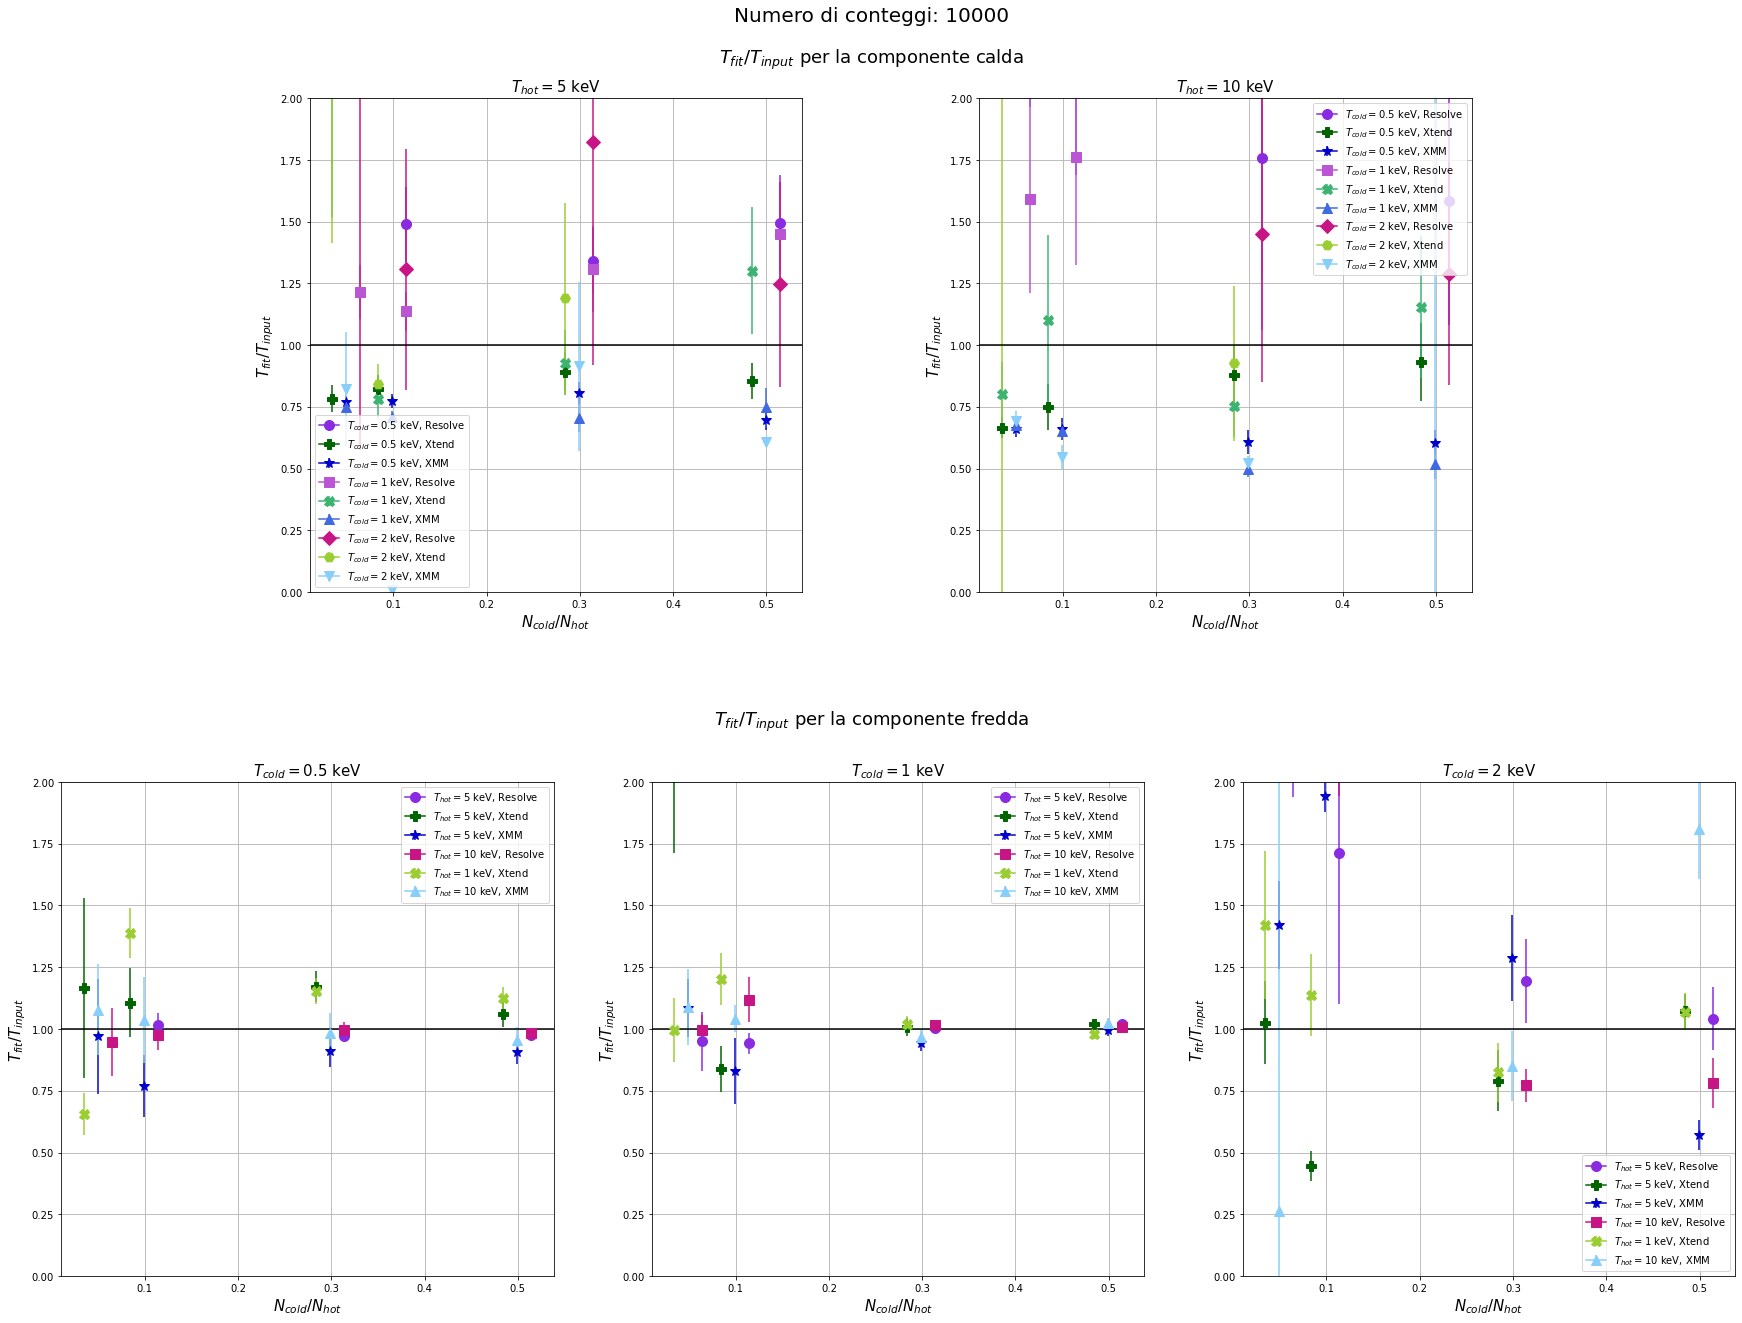

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import SubplotSpec

with open('Resolve/Temperature resolution/temp_resolve_10000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_resolve = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_resolve = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        

with open('Xtend/Temperature resolution/temp_xtend_10000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_hot_xtend = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xtend = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        
with open('XMM/Temperature resolution/temp_xmm_10000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_hot_xmm = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xmm = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        
fig, axes = plt.subplots(2, 3, figsize=(30,20))
axes[0, 2].set_visible(False)
axes[0, 0].set_position([0.24, 0.6, 0.228, 0.343])
axes[0, 1].set_position([0.55, 0.6, 0.228, 0.343])

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        i = 0
    if temp_hot[j] == 10:
        i = 1
    if temp_cold[j] == 0.5:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{cold}=0.5$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="P", markersize=10, label="$T_{cold}=0.5$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumblue', marker="*", markersize=10, label="$T_{cold}=0.5$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="P", markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumblue', marker="*", markersize=10)
    if temp_cold[j] == 1.:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s",  markersize=10, label="$T_{cold}=1$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="X",  markersize=10, label="$T_{cold}=1$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='royalblue', marker="^", markersize=10, label="$T_{cold}=1$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="X",  markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='royalblue', marker="^", markersize=10)
    if temp_cold[j] == 2.:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{cold}=2$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="H", markersize=10, label="$T_{cold}=2$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='lightskyblue', marker="v", markersize=10, label="$T_{cold}=2$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="H", markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='lightskyblue', marker="v", markersize=10)



for k in [0, 1]:
    axes[0, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
    axes[0, k].legend()
    axes[0, k].grid(True)
    axes[0, 0].set_title('$T_{hot} = 5$ keV', fontsize = 15)
    axes[0, 1].set_title('$T_{hot} = 10$ keV', fontsize = 15)
    axes[0, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[0, k].axhline(y=1, color='black')
    axes[0, k].set_ylim([0, 2])
    
with open('Resolve/Temperature resolution/temp_resolve_10000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_cold_resolve = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_resolve = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
        

with open('Xtend/Temperature resolution/temp_xtend_10000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_cold_xtend = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xtend = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
        
with open('XMM/Temperature resolution/temp_xmm_10000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_cold_xmm = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xmm = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
i = 0;

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        i = 0
    if temp_cold[j] == 1:
        i = 1
    if temp_cold[j] == 2:
        i = 2
    if temp_hot[j] == 5.:
        if round(norm[j],2) == 0.05:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot}=5$ keV, Resolve")
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="P", markersize=10, label="$T_{hot}=5$ keV, Xtend")
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumblue', marker="*", markersize=10, label="$T_{hot}=5$ keV, XMM")
        else:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10)
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="P", markersize=10)
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumblue', marker="*", markersize=10)
    if temp_hot[j] == 10.:
        if round(norm[j],2) == 0.05:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="s",  markersize=10, label="$T_{hot}=10$ keV, Resolve")
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="X",  markersize=10, label="$T_{hot}=1$ keV, Xtend")
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='lightskyblue', marker="^", markersize=10, label="$T_{hot}=10$ keV, XMM")
        else:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="s", markersize=10)
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="X",  markersize=10)
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='lightskyblue', marker="^", markersize=10)


for k in [0, 1, 2]:
    axes[1, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
    axes[1, k].legend()
    axes[1, k].grid(True)
    axes[1, 0].set_title('$T_{cold} = 0.5$ keV', fontsize = 15)
    axes[1, 1].set_title('$T_{cold} = 1$ keV', fontsize = 15)
    axes[1, 2].set_title('$T_{cold} = 2$ keV', fontsize = 15)
    axes[1, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[1, k].axhline(y=1, color='black')
    axes[1, k].set_ylim([0, 2])
    
fig.text(0.5, 0.51, '$T_{fit}/T_{input}$ per la componente fredda', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.97, '$T_{fit}/T_{input}$ per la componente calda', ha='center', va='center', fontsize=18)
fig.text(0.5, 1, 'Numero di conteggi: 10000', ha='center', va='center', fontsize=20)

plt.show()


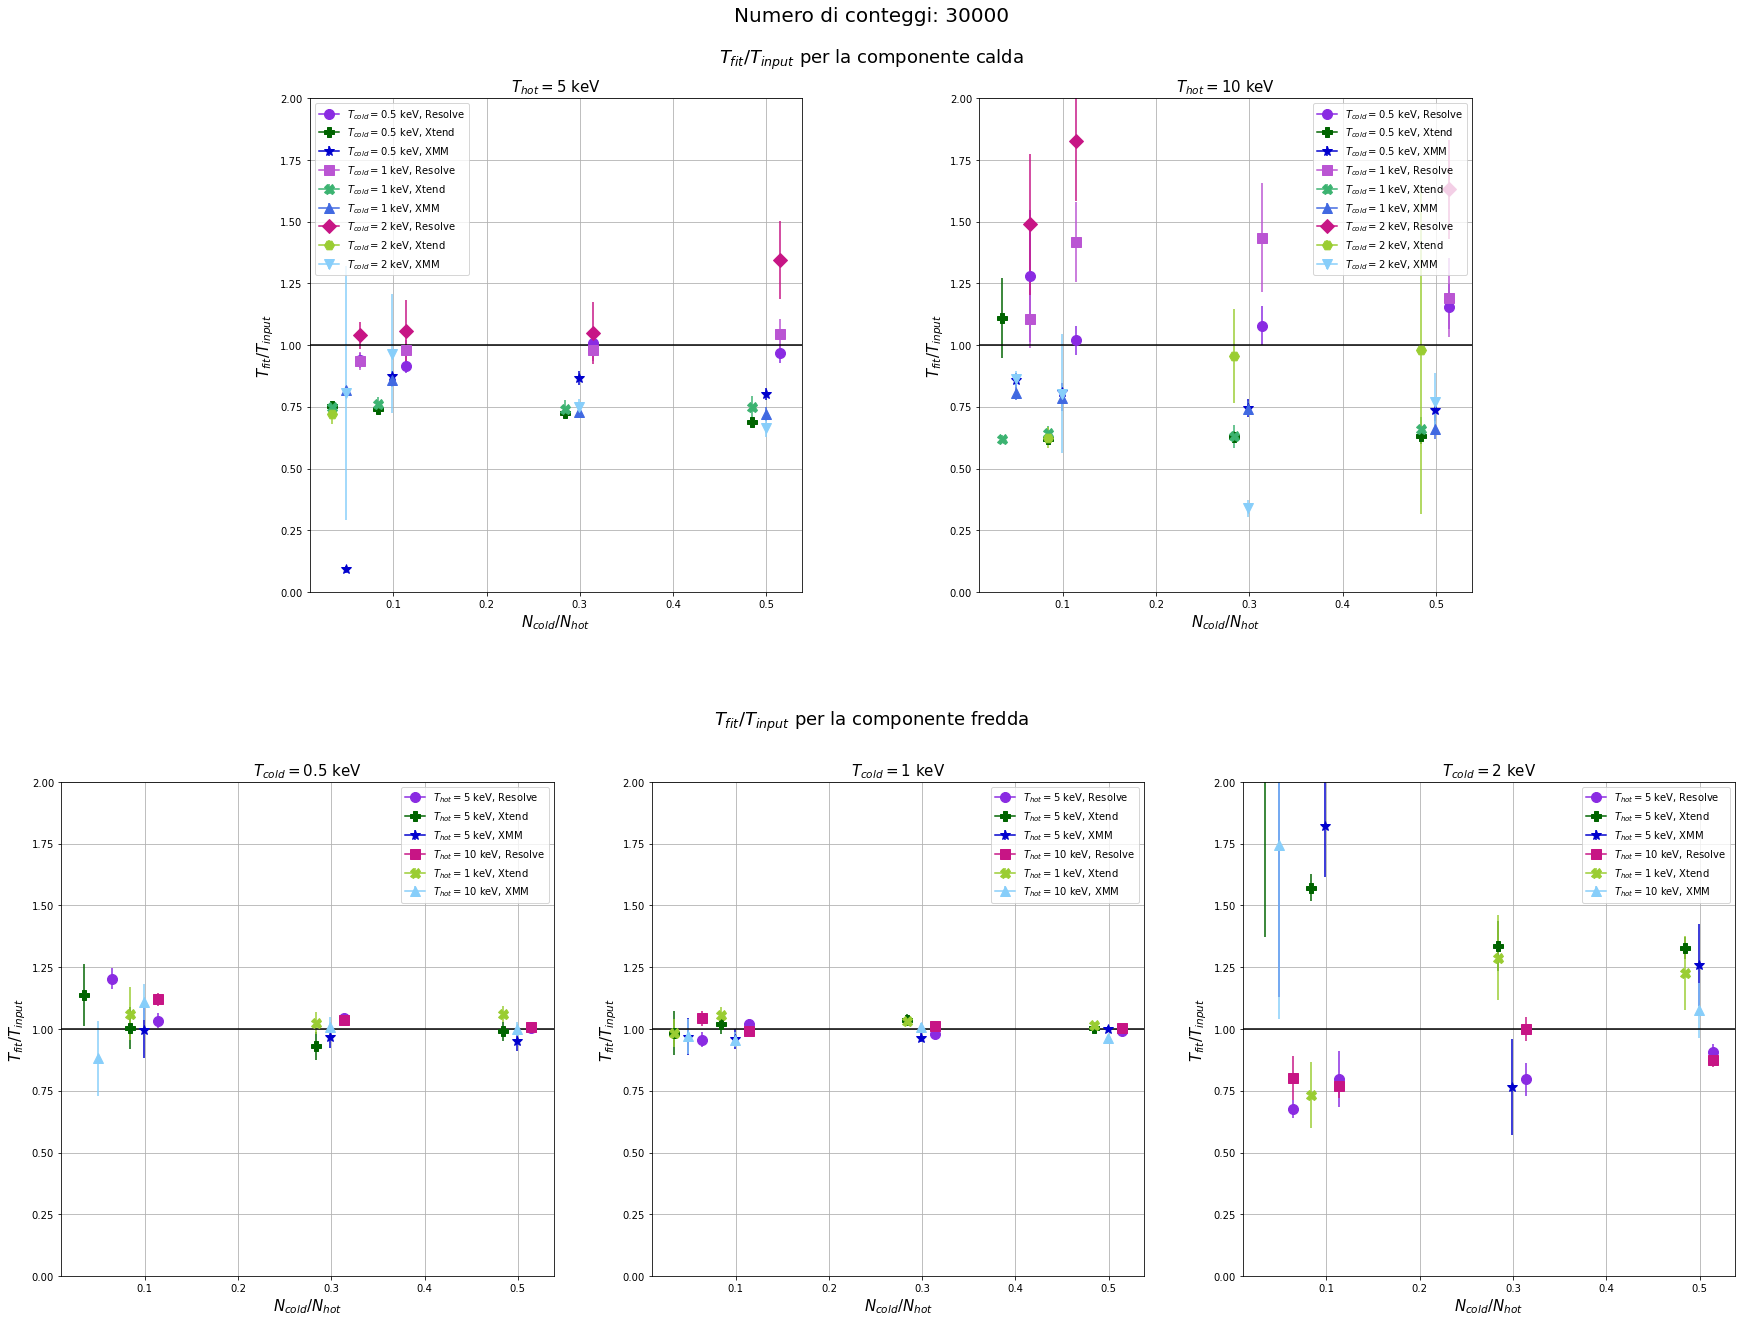

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import SubplotSpec

with open('Resolve/Temperature resolution/temp_resolve_30000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_resolve = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_resolve = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        

with open('Xtend/Temperature resolution/temp_xtend_30000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_hot_xtend = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xtend = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        
with open('XMM/Temperature resolution/temp_xmm_30000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_hot_xmm = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xmm = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        
fig, axes = plt.subplots(2, 3, figsize=(30,20))
axes[0, 2].set_visible(False)
axes[0, 0].set_position([0.24, 0.6, 0.228, 0.343])
axes[0, 1].set_position([0.55, 0.6, 0.228, 0.343])

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        i = 0
    if temp_hot[j] == 10:
        i = 1
    if temp_cold[j] == 0.5:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{cold}=0.5$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="P", markersize=10, label="$T_{cold}=0.5$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumblue', marker="*", markersize=10, label="$T_{cold}=0.5$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="P", markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumblue', marker="*", markersize=10)
    if temp_cold[j] == 1.:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s",  markersize=10, label="$T_{cold}=1$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="X",  markersize=10, label="$T_{cold}=1$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='royalblue', marker="^", markersize=10, label="$T_{cold}=1$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="X",  markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='royalblue', marker="^", markersize=10)
    if temp_cold[j] == 2.:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{cold}=2$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="H", markersize=10, label="$T_{cold}=2$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='lightskyblue', marker="v", markersize=10, label="$T_{cold}=2$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="H", markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='lightskyblue', marker="v", markersize=10)



for k in [0, 1]:
    axes[0, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
    axes[0, k].legend()
    axes[0, k].grid(True)
    axes[0, 0].set_title('$T_{hot} = 5$ keV', fontsize = 15)
    axes[0, 1].set_title('$T_{hot} = 10$ keV', fontsize = 15)
    axes[0, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[0, k].axhline(y=1, color='black')
    axes[0, k].set_ylim([0, 2])

with open('Resolve/Temperature resolution/temp_resolve_30000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_cold_resolve = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_resolve = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
        

with open('Xtend/Temperature resolution/temp_xtend_30000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_cold_xtend = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xtend = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
        
with open('XMM/Temperature resolution/temp_xmm_30000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_cold_xmm = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xmm = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
i = 0;

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        i = 0
    if temp_cold[j] == 1:
        i = 1
    if temp_cold[j] == 2:
        i = 2
    if temp_hot[j] == 5.:
        if round(norm[j],2) == 0.05:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot}=5$ keV, Resolve")
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="P", markersize=10, label="$T_{hot}=5$ keV, Xtend")
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumblue', marker="*", markersize=10, label="$T_{hot}=5$ keV, XMM")
        else:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10)
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="P", markersize=10)
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumblue', marker="*", markersize=10)
    if temp_hot[j] == 10.:
        if round(norm[j],2) == 0.05:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="s",  markersize=10, label="$T_{hot}=10$ keV, Resolve")
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="X",  markersize=10, label="$T_{hot}=1$ keV, Xtend")
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='lightskyblue', marker="^", markersize=10, label="$T_{hot}=10$ keV, XMM")
        else:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="s", markersize=10)
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="X",  markersize=10)
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='lightskyblue', marker="^", markersize=10)


for k in [0, 1, 2]:
    axes[1, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
    axes[1, k].legend()
    axes[1, k].grid(True)
    axes[1, 0].set_title('$T_{cold} = 0.5$ keV', fontsize = 15)
    axes[1, 1].set_title('$T_{cold} = 1$ keV', fontsize = 15)
    axes[1, 2].set_title('$T_{cold} = 2$ keV', fontsize = 15)
    axes[1, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[1, k].axhline(y=1, color='black')
    axes[1, k].set_ylim([0, 2])

fig.text(0.5, 0.51, '$T_{fit}/T_{input}$ per la componente fredda', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.97, '$T_{fit}/T_{input}$ per la componente calda', ha='center', va='center', fontsize=18)
fig.text(0.5, 1, 'Numero di conteggi: 30000', ha='center', va='center', fontsize=20)

plt.show()


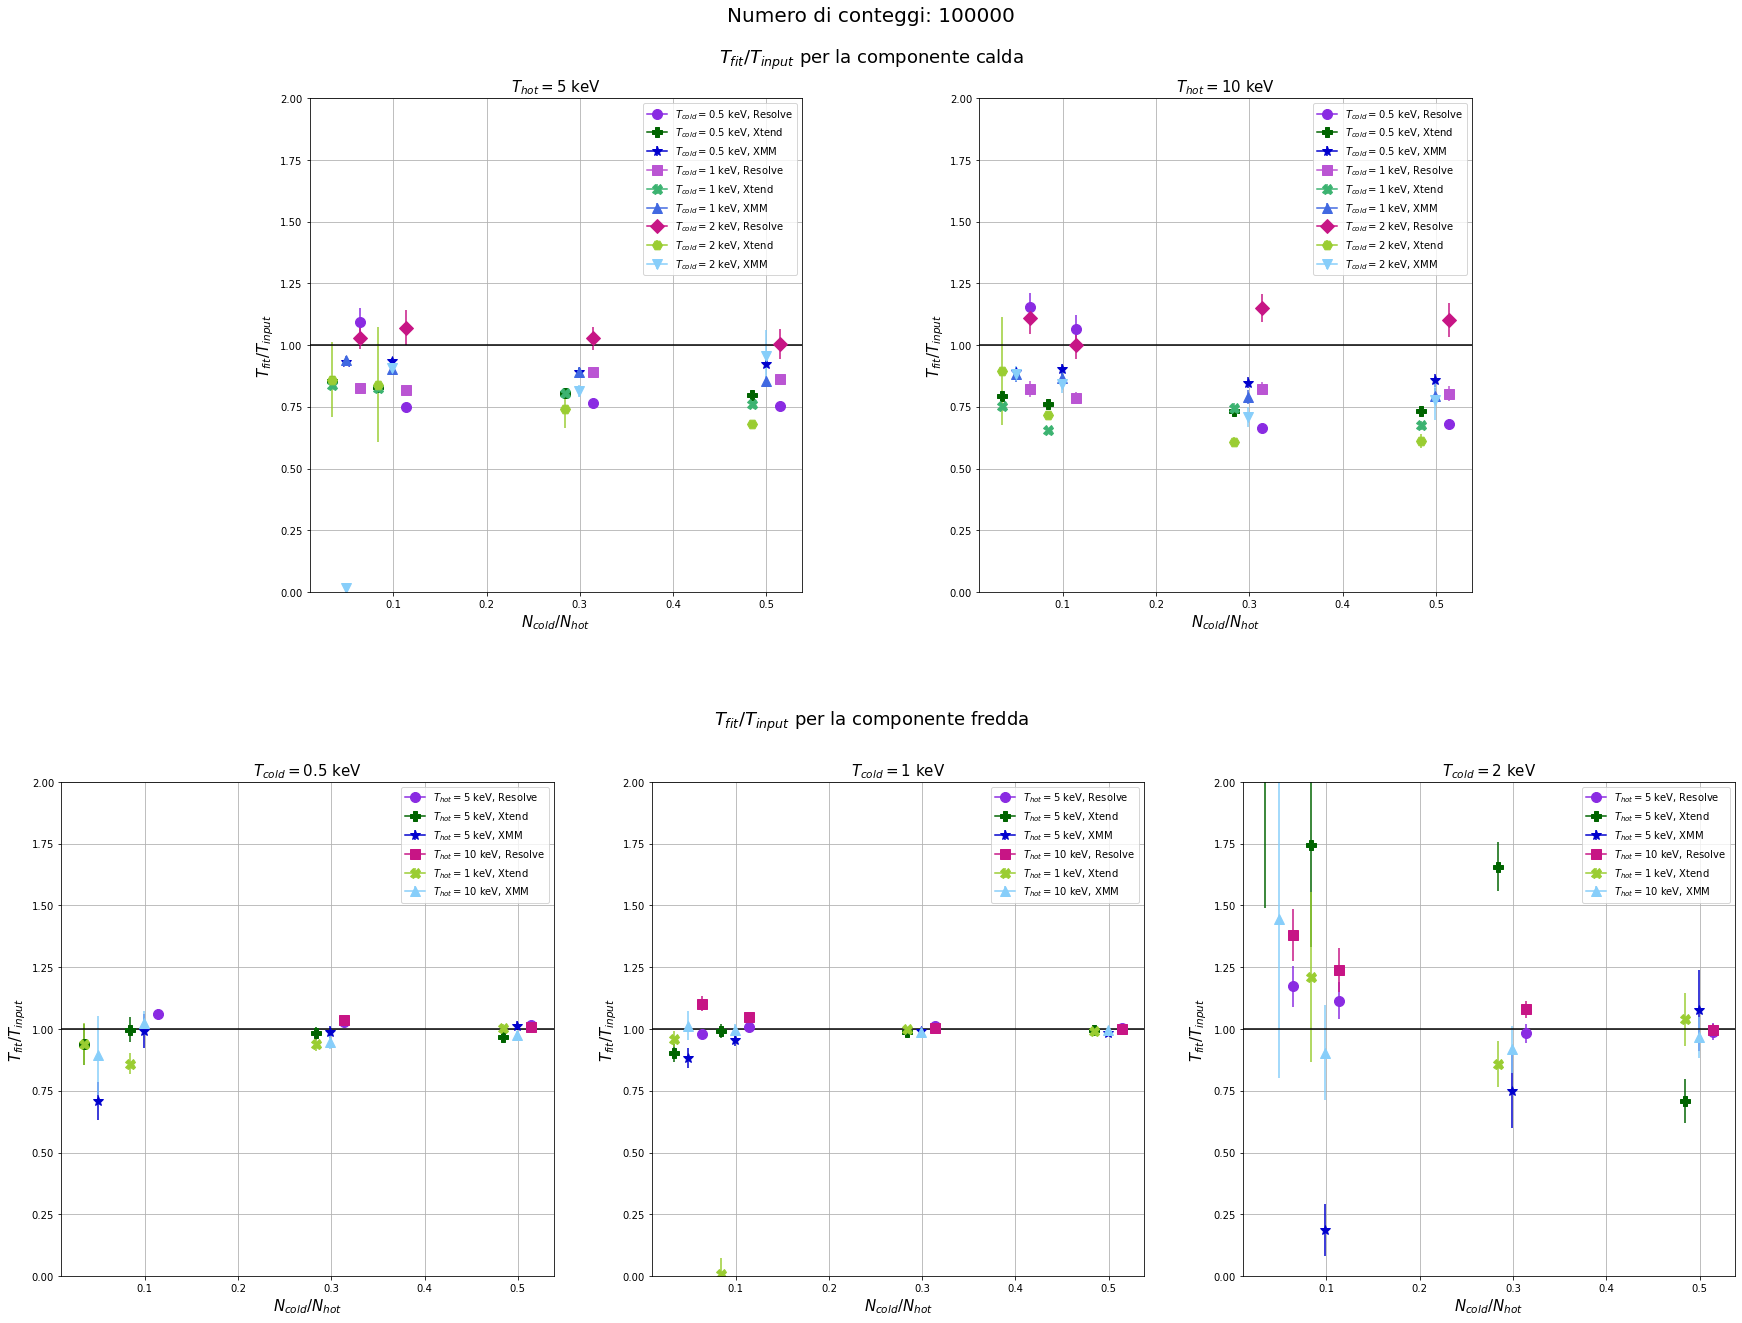

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import SubplotSpec

with open('Resolve/Temperature resolution/temp_resolve_100000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_resolve = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_resolve = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        

with open('Xtend/Temperature resolution/temp_xtend_100000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_hot_xtend = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xtend = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        
with open('XMM/Temperature resolution/temp_xmm_100000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_hot_xmm = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xmm = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        
fig, axes = plt.subplots(2, 3, figsize=(30,20))
axes[0, 2].set_visible(False)
axes[0, 0].set_position([0.24, 0.6, 0.228, 0.343])
axes[0, 1].set_position([0.55, 0.6, 0.228, 0.343])

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        i = 0
    if temp_hot[j] == 10:
        i = 1
    if temp_cold[j] == 0.5:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{cold}=0.5$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="P", markersize=10, label="$T_{cold}=0.5$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumblue', marker="*", markersize=10, label="$T_{cold}=0.5$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="P", markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumblue', marker="*", markersize=10)
    if temp_cold[j] == 1.:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s",  markersize=10, label="$T_{cold}=1$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="X",  markersize=10, label="$T_{cold}=1$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='royalblue', marker="^", markersize=10, label="$T_{cold}=1$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="X",  markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='royalblue', marker="^", markersize=10)
    if temp_cold[j] == 2.:
        if round(norm[j],2) == 0.05:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{cold}=2$ keV, Resolve")
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="H", markersize=10, label="$T_{cold}=2$ keV, Xtend")
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='lightskyblue', marker="v", markersize=10, label="$T_{cold}=2$ keV, XMM")
        else:
            axes[0, i].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10)
            axes[0, i].errorbar(norm[j]-0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="H", markersize=10)
            axes[0, i].errorbar(norm[j], ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='lightskyblue', marker="v", markersize=10)



for k in [0, 1]:
    axes[0, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
    axes[0, k].legend()
    axes[0, k].grid(True)
    axes[0, 0].set_title('$T_{hot} = 5$ keV', fontsize = 15)
    axes[0, 1].set_title('$T_{hot} = 10$ keV', fontsize = 15)
    axes[0, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[0, k].axhline(y=1, color='black')
    axes[0, k].set_ylim([0, 2])

with open('Resolve/Temperature resolution/temp_resolve_100000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_cold_resolve = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_resolve = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
        

with open('Xtend/Temperature resolution/temp_xtend_100000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_cold_xtend = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xtend = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
        
with open('XMM/Temperature resolution/temp_xmm_100000_doubleT.dat') as f:
        lines = f.readlines()
        ratio_cold_xmm = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xmm = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]
i = 0;

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        i = 0
    if temp_cold[j] == 1:
        i = 1
    if temp_cold[j] == 2:
        i = 2
    if temp_hot[j] == 5.:
        if round(norm[j],2) == 0.05:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot}=5$ keV, Resolve")
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="P", markersize=10, label="$T_{hot}=5$ keV, Xtend")
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumblue', marker="*", markersize=10, label="$T_{hot}=5$ keV, XMM")
        else:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10)
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="P", markersize=10)
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumblue', marker="*", markersize=10)
    if temp_hot[j] == 10.:
        if round(norm[j],2) == 0.05:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="s",  markersize=10, label="$T_{hot}=10$ keV, Resolve")
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="X",  markersize=10, label="$T_{hot}=1$ keV, Xtend")
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='lightskyblue', marker="^", markersize=10, label="$T_{hot}=10$ keV, XMM")
        else:
            axes[1, i].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="s", markersize=10)
            axes[1, i].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="X",  markersize=10)
            axes[1, i].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='lightskyblue', marker="^", markersize=10)


for k in [0, 1, 2]:
    axes[1, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
    axes[1, k].legend()
    axes[1, k].grid(True)
    axes[1, 0].set_title('$T_{cold} = 0.5$ keV', fontsize = 15)
    axes[1, 1].set_title('$T_{cold} = 1$ keV', fontsize = 15)
    axes[1, 2].set_title('$T_{cold} = 2$ keV', fontsize = 15)
    axes[1, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[1, k].axhline(y=1, color='black')
    axes[1, k].set_ylim([0, 2])

fig.text(0.5, 0.51, '$T_{fit}/T_{input}$ per la componente fredda', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.97, '$T_{fit}/T_{input}$ per la componente calda', ha='center', va='center', fontsize=18)
fig.text(0.5, 1, 'Numero di conteggi: 100000', ha='center', va='center', fontsize=20)

plt.show()


Simulazioni plasma 2T & fit 2T (Resolve vs XTEND vs XMM)
Nel regime alti conteggi (i.e. 1E5 cnt): 
RESOLVE recupera la Thot abbastanza bene se Tcold non e' troppo bassa (i.e. Tcold>=2) altrimenti si va a bias del 20-30% che pero' non sembra dipendere da quanto gas freddo c'e' rispetto a quello caldo (i.e. N ratio).
XMM-PN tende ad avere un bias di ~5% indipendentemente da Tcold e N ratio.
XTEND sembra piu' sensibile a N ratio rispetto a Tcold.
 
In generale le Tcold sono recuperate meglio (cosa che ci si aspetta per l'EA di questi strumenti) in particolare quando la Tcold e' piu' fredda (i.e. Tcold=[0.5,1] e quando c'e' una buona quantita' di gas freddo (i.e. N ratio alti).
Quando la T si alza (e.g. Tcold=2) cominciano ad esserci dei problemi man mano che la percentuale di gas freddo diminuisce ma RESOLVE sembra comportarsi meglio degli altri.
Una cosa utile da fare e' vedere un po di spettri con le diverse componenti con diverse combinazioni e strumenti. Vedi figura in allegato come esempio dove in blu e in rosso sono mostrate componenti con T e N diverse e in nero la somma delle 2. Fatto con XRISM.
 
Nel regime a bassi conteggi ne discutiamo non appena abbiamo i plot con scale diverse. 
In generale mi sembra che sia confermato il trend con alti conteggi. 
Un dubbio che mi viene e' se i plot con Thot=10 siano cosi diversi perche' il fit viene fatto fino a 7 keV (giusto?). Se la T e' molto alta il bremsstrahlung cutoff e'
in un regime non fittato. Fai un po di tests per vedere cosa cambia se fitti fino a 10 keV invece che 7.
Controllare anche se il bias della Tcold anticorrela con il bias della Thot. E.g. Plot fit_Tcold/input_Tcold vs fit_Thot/input_Thot (questo puo' dare info sulla degenerazione delle misure


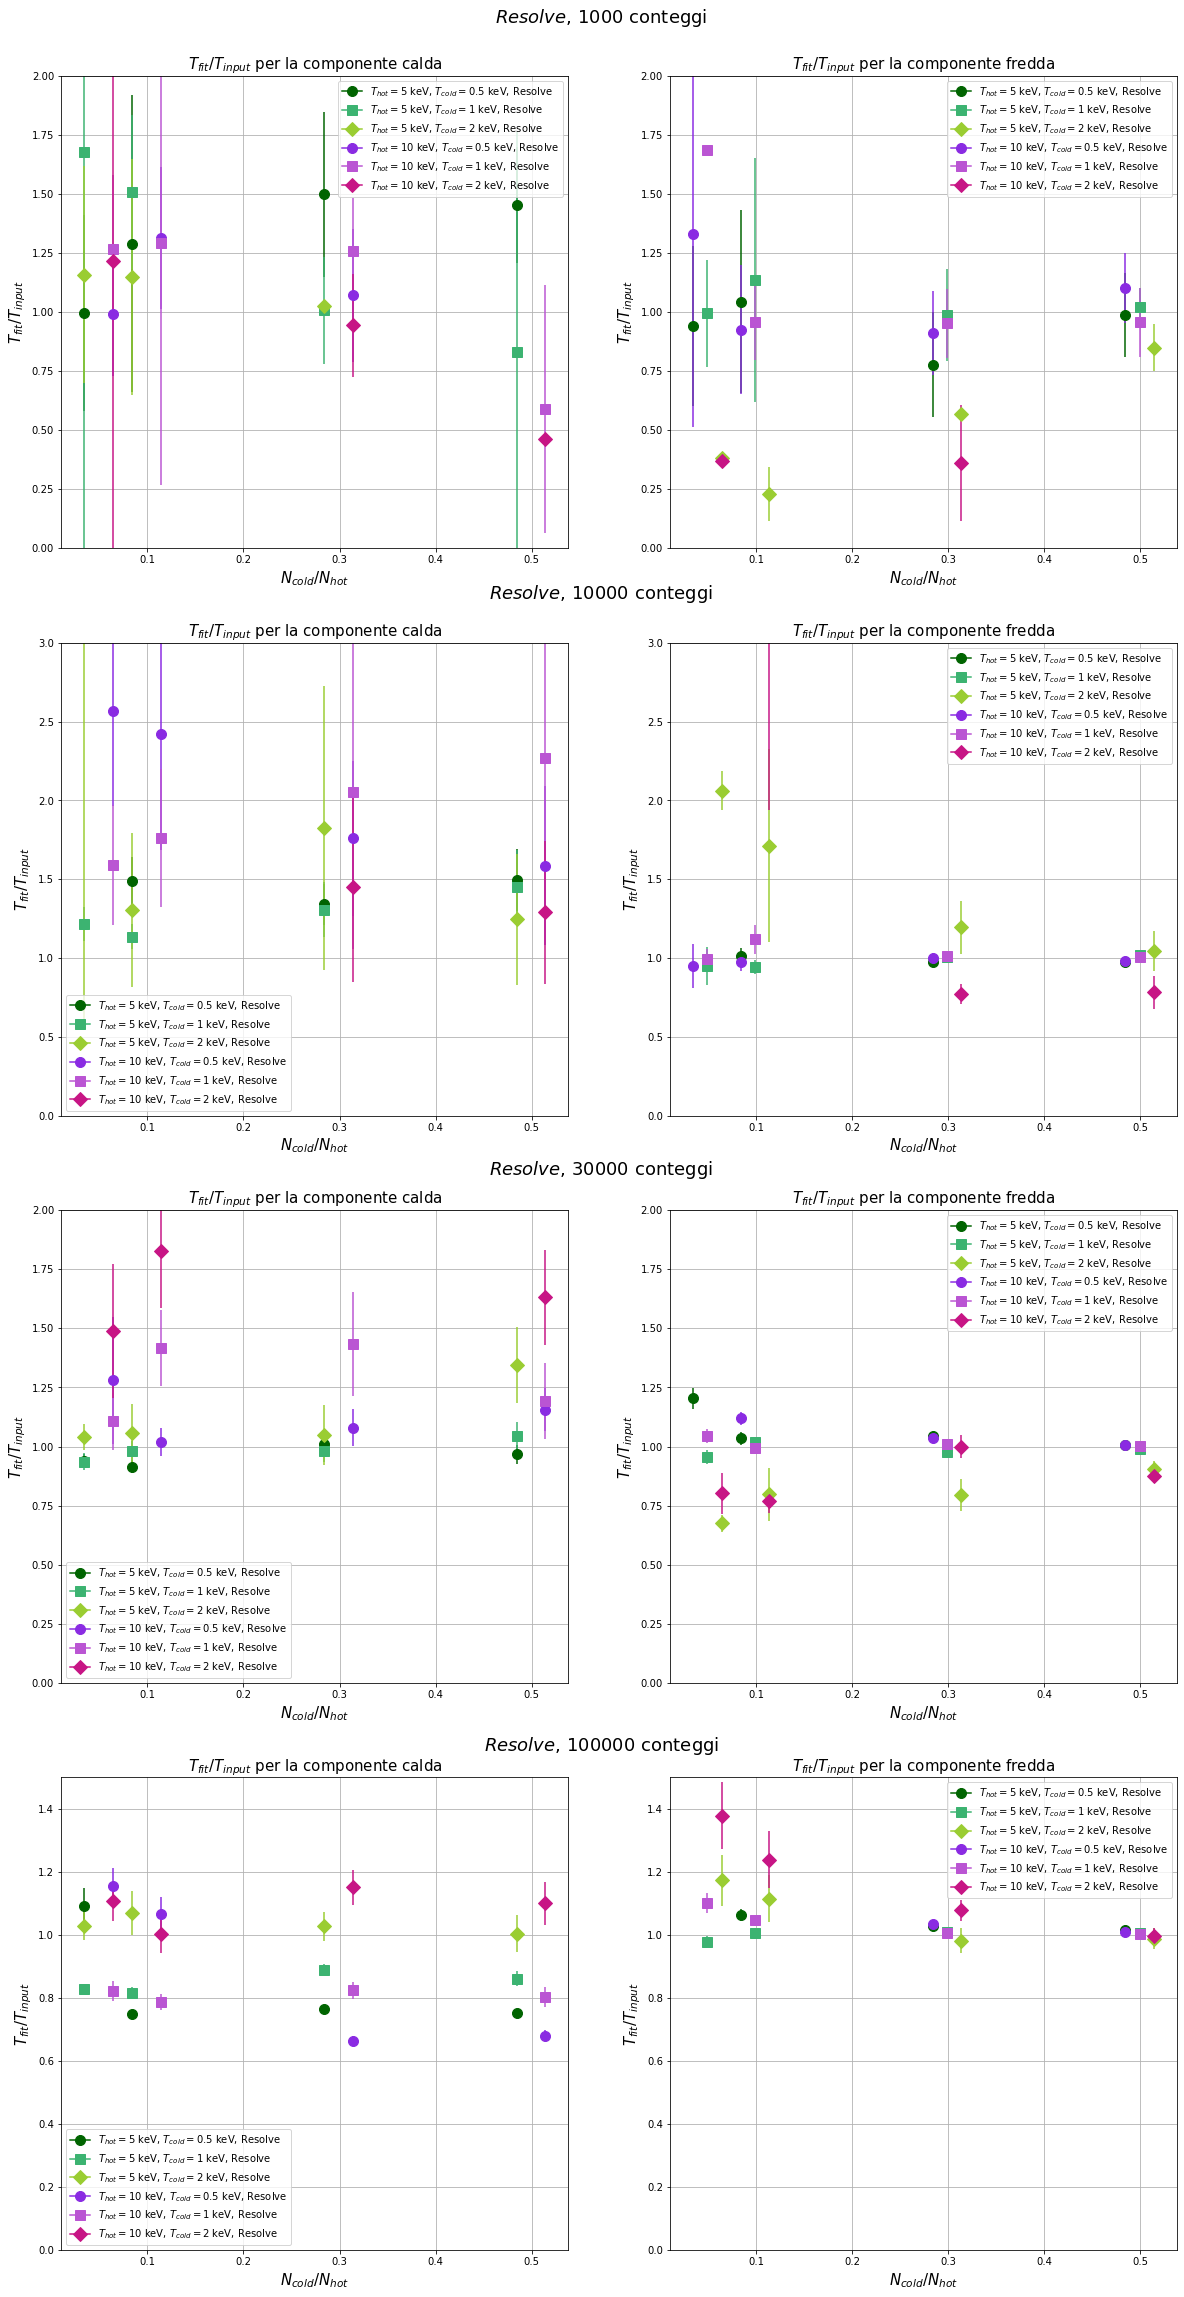

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import SubplotSpec

with open('Resolve/Temperature resolution/temp_resolve_1000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_resolve = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_resolve = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_resolve = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_resolve = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

fig, axes = plt.subplots(4, 2, figsize=(20,40))

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, Resolve")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, Resolve")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, Resolve")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, Resolve")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, Resolve")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, Resolve")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, Resolve")
                else:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, Resolve")
                else:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, Resolve")
                else:
                    axes[0,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, Resolve")
                else:
                    axes[0,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, Resolve")
                else:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, Resolve")
                else:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('Resolve/Temperature resolution/temp_resolve_10000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_resolve = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_resolve = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_resolve = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_resolve = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, Resolve")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, Resolve")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, Resolve")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, Resolve")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, Resolve")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, Resolve")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, Resolve")
                else:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, Resolve")
                else:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, Resolve")
                else:
                    axes[1,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, Resolve")
                else:
                    axes[1,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, Resolve")
                else:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, Resolve")
                else:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('Resolve/Temperature resolution/temp_resolve_30000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_resolve = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_resolve = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_resolve = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_resolve = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, Resolve")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, Resolve")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, Resolve")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, Resolve")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, Resolve")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, Resolve")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, Resolve")
                else:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, Resolve")
                else:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, Resolve")
                else:
                    axes[2,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, Resolve")
                else:
                    axes[2,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, Resolve")
                else:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, Resolve")
                else:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('Resolve/Temperature resolution/temp_resolve_100000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_resolve = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_resolve = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_resolve = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_resolve = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, Resolve")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, Resolve")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, Resolve")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, Resolve")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, Resolve")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, Resolve")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_resolve[j], yerr=error_hot_resolve[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, Resolve")
                else:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, Resolve")
                else:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, Resolve")
                else:
                    axes[3,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, Resolve")
                else:
                    axes[3,1].errorbar(norm[j], ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, Resolve")
                else:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, Resolve")
                else:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_resolve[j], yerr=error_cold_resolve[j], color='mediumvioletred', marker="D", markersize = 10)  


for k in [0, 1]:
    for l in [0, 1, 2, 3]:
        axes[l, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
        axes[l, k].legend()
        axes[l, k].grid(True)
        axes[l, 0].set_title('$T_{fit}/T_{input}$ per la componente calda', fontsize = 15)
        axes[l, 1].set_title('$T_{fit}/T_{input}$ per la componente fredda', fontsize = 15)
        #axes[k].set_yscale('log')
        axes[l, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[0, k].set_ylim([0, 2])
    axes[1, k].set_ylim([0, 3])
    axes[2, k].set_ylim([0, 2])
    axes[3, k].set_ylim([0, 1.5])

fig.text(0.5, 0.9, '$Resolve$, 1000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.7, '$Resolve$, 10000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.5, '$Resolve$, 30000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.3, '$Resolve$, 100000 conteggi', ha='center', va='center', fontsize=18)


plt.show()


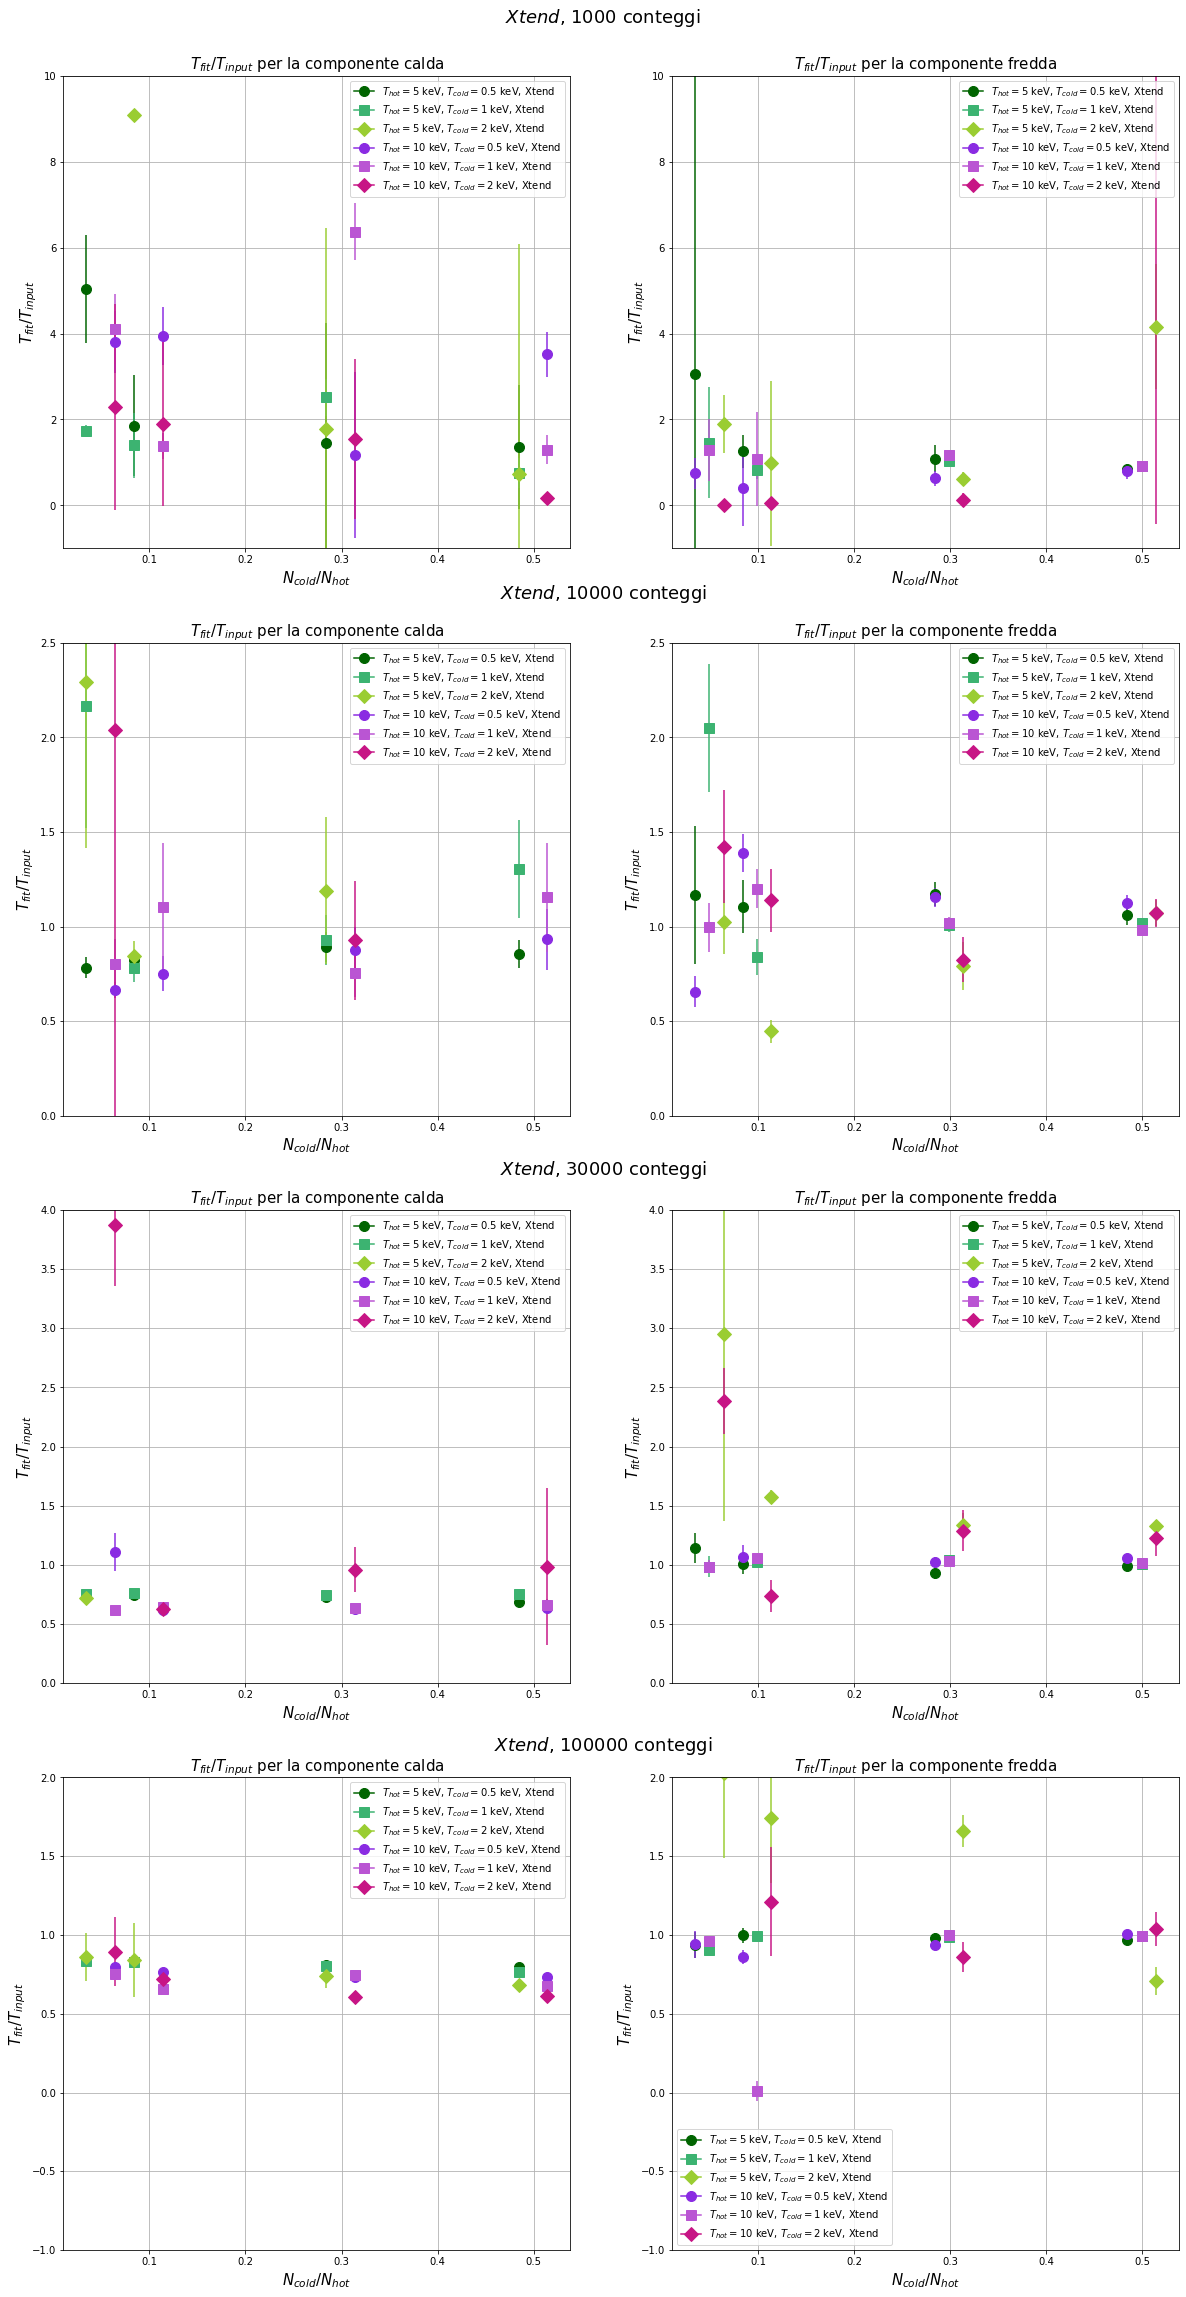

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import SubplotSpec

with open('Xtend/Temperature resolution/temp_xtend_1000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_xtend = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xtend = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_xtend = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xtend = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

fig, axes = plt.subplots(4, 2, figsize=(20,40))

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, Xtend")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, Xtend")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, Xtend")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, Xtend")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, Xtend")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, Xtend")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, Xtend")
                else:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, Xtend")
                else:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, Xtend")
                else:
                    axes[0,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, Xtend")
                else:
                    axes[0,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, Xtend")
                else:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, Xtend")
                else:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('Xtend/Temperature resolution/temp_xtend_10000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_xtend = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xtend = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_xtend = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xtend = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, Xtend")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, Xtend")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, Xtend")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, Xtend")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, Xtend")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, Xtend")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, Xtend")
                else:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, Xtend")
                else:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, Xtend")
                else:
                    axes[1,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, Xtend")
                else:
                    axes[1,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, Xtend")
                else:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, Xtend")
                else:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('Xtend/Temperature resolution/temp_xtend_30000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_xtend = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xtend = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_xtend = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xtend = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, Xtend")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, Xtend")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, Xtend")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, Xtend")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, Xtend")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, Xtend")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, Xtend")
                else:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, Xtend")
                else:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, Xtend")
                else:
                    axes[2,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, Xtend")
                else:
                    axes[2,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, Xtend")
                else:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, Xtend")
                else:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('Xtend/Temperature resolution/temp_xtend_100000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_xtend = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xtend = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_xtend = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xtend = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, Xtend")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, Xtend")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, Xtend")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, Xtend")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, Xtend")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, Xtend")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xtend[j], yerr=error_hot_xtend[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, Xtend")
                else:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, Xtend")
                else:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, Xtend")
                else:
                    axes[3,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, Xtend")
                else:
                    axes[3,1].errorbar(norm[j], ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, Xtend")
                else:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, Xtend")
                else:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_xtend[j], yerr=error_cold_xtend[j], color='mediumvioletred', marker="D", markersize = 10)  


for k in [0, 1]:
    for l in [0, 1, 2, 3]:
        axes[l, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
        axes[l, k].legend()
        axes[l, k].grid(True)
        axes[l, 0].set_title('$T_{fit}/T_{input}$ per la componente calda', fontsize = 15)
        axes[l, 1].set_title('$T_{fit}/T_{input}$ per la componente fredda', fontsize = 15)
        #axes[k].set_yscale('log')
        axes[l, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[0, k].set_ylim([-1, 10])
    axes[1, k].set_ylim([0, 2.5])
    axes[2, k].set_ylim([0, 4])
    axes[3, k].set_ylim([-1, 2])
fig.text(0.5, 0.9, '$Xtend$, 1000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.7, '$Xtend$, 10000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.5, '$Xtend$, 30000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.3, '$Xtend$, 100000 conteggi', ha='center', va='center', fontsize=18)


plt.show()


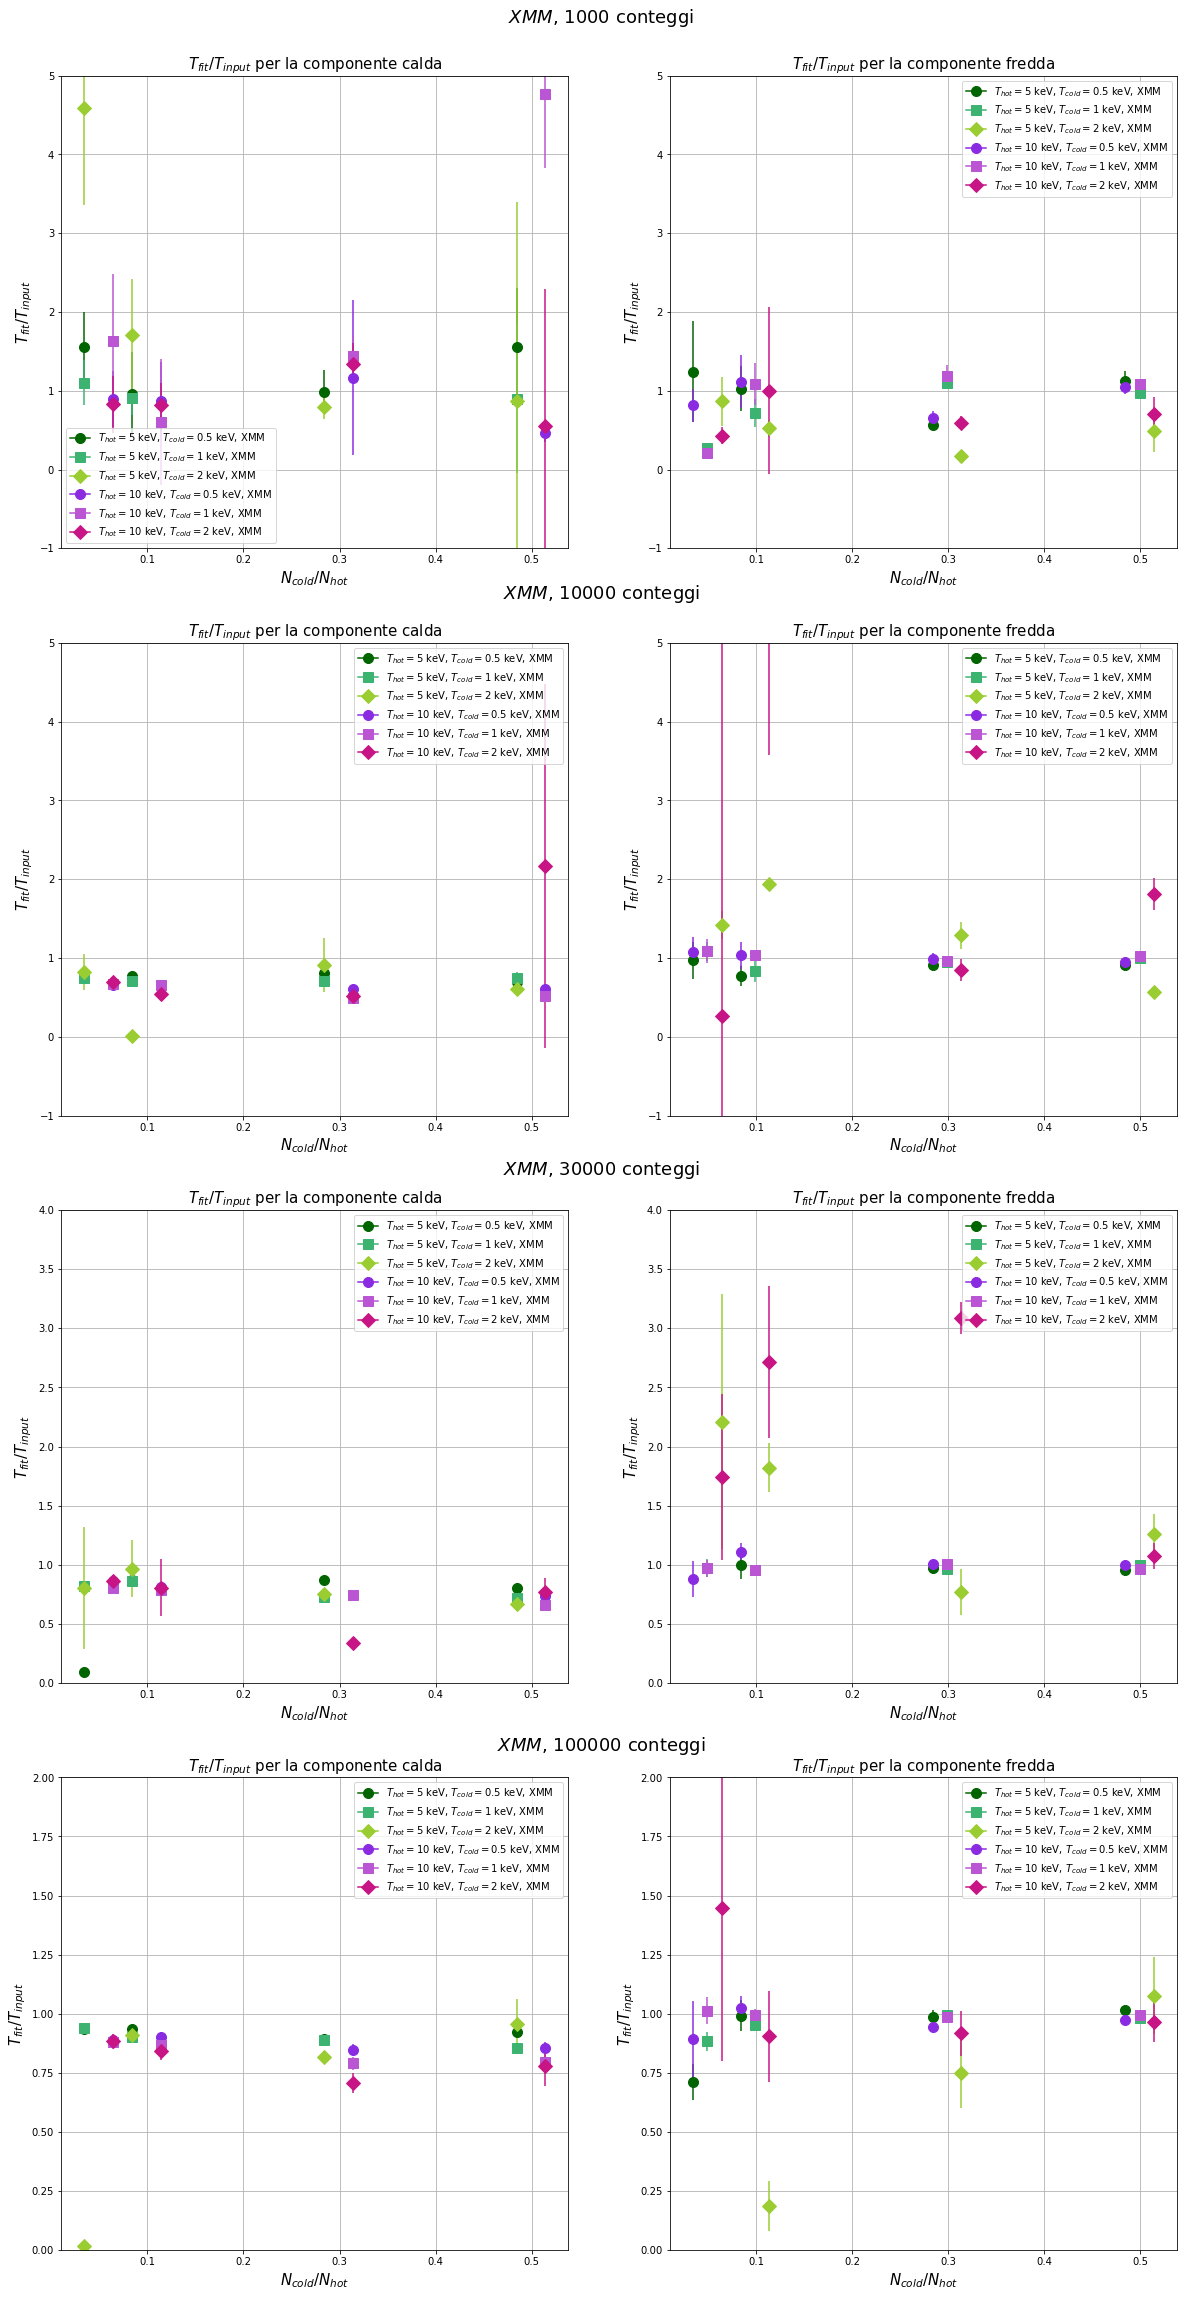

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import SubplotSpec

with open('XMM/Temperature resolution/temp_xmm_1000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_xmm = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xmm = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_xmm = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xmm = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

fig, axes = plt.subplots(4, 2, figsize=(20,40))

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, XMM")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, XMM")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, XMM")
            else:
                axes[0,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, XMM")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, XMM")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, XMM")
            else:
                axes[0,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, XMM")
                else:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, XMM")
                else:
                    axes[0,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, XMM")
                else:
                    axes[0,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, XMM")
                else:
                    axes[0,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, XMM")
                else:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, XMM")
                else:
                    axes[0,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('XMM/Temperature resolution/temp_xmm_10000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_xmm = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xmm = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_xmm = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xmm = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, XMM")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, XMM")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, XMM")
            else:
                axes[1,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, XMM")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, XMM")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, XMM")
            else:
                axes[1,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, XMM")
                else:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, XMM")
                else:
                    axes[1,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, XMM")
                else:
                    axes[1,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, XMM")
                else:
                    axes[1,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, XMM")
                else:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, XMM")
                else:
                    axes[1,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('XMM/Temperature resolution/temp_xmm_30000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_xmm = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xmm = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_xmm = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xmm = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, XMM")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, XMM")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, XMM")
            else:
                axes[2,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, XMM")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, XMM")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, XMM")
            else:
                axes[2,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, XMM")
                else:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, XMM")
                else:
                    axes[2,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, XMM")
                else:
                    axes[2,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, XMM")
                else:
                    axes[2,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, XMM")
                else:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, XMM")
                else:
                    axes[2,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumvioletred', marker="D", markersize = 10)  

with open('XMM/Temperature resolution/temp_xmm_100000_doubleT.dat') as f:
        lines = f.readlines()
        temp_cold = [float(line.split()[0]) for line in lines]
        temp_hot = [float(line.split()[1]) for line in lines]
        norm = [float(line.split()[2])/float(line.split()[3]) for line in lines]
        ratio_hot_xmm = [float(line.split()[5])/float(line.split()[4]) for line in lines]
        error_hot_xmm = [( float(line.split()[7]) - float(line.split()[6]) )/( 2*float(line.split()[4]) ) for line in lines]
        ratio_cold_xmm = [float(line.split()[8])/float(line.split()[0]) for line in lines]
        error_cold_xmm = [( float(line.split()[10]) - float(line.split()[9]) )/( 2*float(line.split()[0]) ) for line in lines]

for j in range(len(temp_hot)):
    if temp_hot[j] == 5:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=0.5$ keV, XMM")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='darkgreen', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=1$ keV, XMM")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold}=2$ keV, XMM")
            else:
                axes[3,0].errorbar(norm[j]-.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='yellowgreen', marker="D", markersize = 10)
    if temp_hot[j] == 10:
        if temp_cold[j] == 0.5:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=0.5$ keV, XMM")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='blueviolet', marker="o", markersize=10)
        if temp_cold[j] == 1:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=1$ keV, XMM")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumorchid', marker="s", markersize=10)
        if temp_cold[j] == 2:
            if round(norm[j],2) == 0.05:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold}=2$ keV, XMM")
            else:
                axes[3,0].errorbar(norm[j]+0.015, ratio_hot_xmm[j], yerr=error_hot_xmm[j], color='mediumvioletred', marker="D", markersize = 10)

for j in range(len(temp_hot)):
    if temp_cold[j] == 0.5:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='darkgreen', marker="o", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 0.5$ keV, XMM")
                else:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='darkgreen', marker="o", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='blueviolet', marker="o", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 0.5$ keV, XMM")
                else:
                    axes[3,1].errorbar(norm[j]-0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='blueviolet', marker="o", markersize = 10)  
    if temp_cold[j] == 1:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumseagreen', marker="s", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 1$ keV, XMM")
                else:
                    axes[3,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumseagreen', marker="s", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumorchid', marker="s", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 1$ keV, XMM")
                else:
                    axes[3,1].errorbar(norm[j], ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumorchid', marker="s", markersize = 10)  
    if temp_cold[j] == 2:
        if temp_hot[j] == 5:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='yellowgreen', marker="D", markersize=10, label="$T_{hot} = 5$ keV, $T_{cold} = 2$ keV, XMM")
                else:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='yellowgreen', marker="D", markersize=10)
        if temp_hot[j] == 10:
                if round(norm[j],2) == 0.05:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumvioletred', marker="D", markersize=10, label="$T_{hot} = 10$ keV, $T_{cold} = 2$ keV, XMM")
                else:
                    axes[3,1].errorbar(norm[j]+0.015, ratio_cold_xmm[j], yerr=error_cold_xmm[j], color='mediumvioletred', marker="D", markersize = 10)  


for k in [0, 1]:
    for l in [0, 1, 2, 3]:
        axes[l, k].set_xlabel('$N_{cold}/N_{hot}$', fontsize = 15)
        axes[l, k].legend()
        axes[l, k].grid(True)
        axes[l, 0].set_title('$T_{fit}/T_{input}$ per la componente calda', fontsize = 15)
        axes[l, 1].set_title('$T_{fit}/T_{input}$ per la componente fredda', fontsize = 15)
        #axes[k].set_yscale('log')
        axes[l, k].set_ylabel('$T_{fit}/T_{input}$', fontsize = 15)
    axes[0, k].set_ylim([-1, 5])
    axes[1, k].set_ylim([-1, 5])
    axes[2, k].set_ylim([0, 4])
    axes[3, k].set_ylim([0, 2])
fig.text(0.5, 0.9, '$XMM$, 1000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.7, '$XMM$, 10000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.5, '$XMM$, 30000 conteggi', ha='center', va='center', fontsize=18)
fig.text(0.5, 0.3, '$XMM$, 100000 conteggi', ha='center', va='center', fontsize=18)


plt.show()
